# Assignment 9

Name : Ghanashyam Patil  
Roll No : 31162  
Subject : DSBDAL

Problem Statement :
1. Implement naive bayes classification algorithm using Python to perform classification on a given dataset.
2. Compute Confusion Matrix of findTP,FP,TN,FN,Accuracy, Error Rate, Precision,Recall on the given dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [30]:
data = pd.read_csv('../Databases/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Removing Null Values

In [33]:
data.fillna(0)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Naive Bayes Classification

In [34]:
# Select the features (X) and target variable (y)
X = data.drop('Species', axis='columns')
y = data['Species']

In [35]:
X.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [36]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 5), (38, 5), (112,), (38,))

In [39]:
# Create a Naive Bayes classifier
model = GaussianNB()

In [40]:
# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [41]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
print("Predicted Prices : ",y_pred)

Predicted Prices :  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica']


In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

# Confusion Matrix

In [43]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


In [44]:
np.sum(conf_matrix, axis=1)

array([13, 13, 12])

<Axes: >

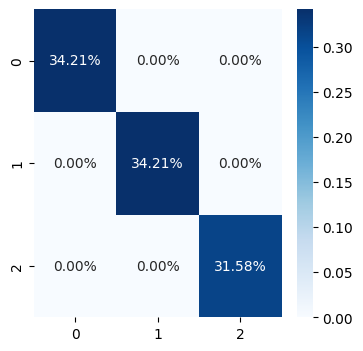

In [45]:
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [46]:
# Function to Extract TP, FP, TN, FN from the confusion matrix

def get_metrics(class_no,conf_matrix):
    row_sums=np.sum(conf_matrix, axis=0)
    col_sums=np.sum(conf_matrix, axis=1)
    TP = conf_matrix[class_no][class_no]
    FP = row_sums[class_no] - conf_matrix[class_no][class_no] 
    FN = col_sums[class_no] - conf_matrix[class_no][class_no]
    TN = np.sum(conf_matrix) - TP - FP - FN
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    return TP, FP, FN, TN, precision, recall,accuracy


In [47]:
# Compute additional performance metrics for Setosa
TP0, FP0, FN0, TN0, precision0, recall0 ,accuracy0 = get_metrics(0,conf_matrix)
error_rate0=1-accuracy0;

print("For Class Setosa")
print("TP : ", TP0)
print("FP : ", FP0)
print("FN : ", FN0)
print("TN : ", TN0)

# Print the performance metrics
print("Accuracy:", accuracy0)
print("Error Rate:", error_rate0)
print("Precision:", precision0)
print("Recall:", recall0)

For Class Setosa
TP :  13
FP :  0
FN :  0
TN :  25
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
